# 파이 차트와 히스토그램

## 파이 차트
전체 데이터에서 그 범주에 해당하는 비율을 표현한다. matplotlib의 pie함수를 사용(seaborn에는 별도로 없음)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import koreanize_matplotlib

In [2]:
df = pd.read_csv('seoul_park.csv')
df.head()

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
0,0,2016-01-01,금,O,구름 조금,2799,141.0,419,47,0,4382,2016,1,1,33590000
1,1,2016-01-02,토,O,구름 많음,4370,203.0,600,100,111,7265,2016,1,2,51730000
2,2,2016-01-03,일,O,구름 많음,2571,128.0,309,91,0,4557,2016,1,3,30080000
3,3,2016-01-04,월,X,구름 많음,602,463.0,235,51,223,1690,2016,1,4,8900000
4,4,2016-01-05,화,X,구름 많음,319,35.0,62,43,47,1256,2016,1,5,4160000


In [6]:
# 2019년의 어른, 청소년, 어린이 입장 분포 보기
data_2019 = df[df['연'] == 2019][['어른','어린이','청소년']].sum()
data_2019

어른     103125.0
어린이     15209.0
청소년      3817.0
dtype: float64

In [11]:
# 파이차트에는 데이터와 레이블이 필요하다.
# 데이터는 각 범주의 숫자를 리스트로 전달
# 레이블은 각 비율이 어떤 항목의 비율인지 보여주기 위해 필요하다.
labels = data_2019.index
data = data_2019
data

어른     103125.0
어린이     15209.0
청소년      3817.0
dtype: float64

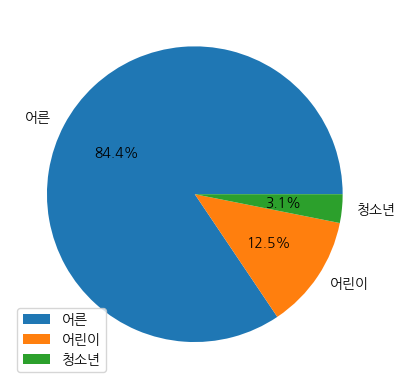

In [21]:
# 파이차트 그리기
plt.pie(x=data, labels=labels, autopct="%1.1f%%")   #  소수점 첫째자리까지 표시
plt.legend(loc='lower left')    # 범례의 위치 조정 가능 // loc = '조정할 위치'
plt.show()

## 히스토그램
특정 구간에 해당하는 빈도를 표현하는 그래프

#### Matplotlib
plt.hist()

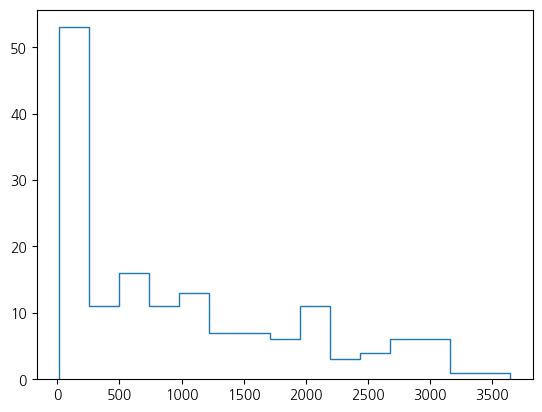

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
1,1,2016-01-02,토,O,구름 많음,4370,203.0,600,100,111,7265,2016,1,2,51730000
8,8,2016-01-09,토,O,구름 많음,1227,78.0,113,47,80,2640,2016,1,9,14180000
15,15,2016-01-16,토,O,구름 많음,1395,97.0,228,23,167,2997,2016,1,16,17200000
22,22,2016-01-23,토,O,구름 조금,198,80.0,18,6,71,890,2016,1,23,2960000
29,29,2016-01-30,토,O,구름 조금,2266,146.0,243,72,0,4128,2016,1,30,26550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,1056,2019-03-02,토,O,NaN,3358,156.0,550,56,0,5491,2019,3,2,40640000
1063,1063,2019-03-09,토,O,NaN,11023,157.0,1422,52,74,17833,2019,3,9,126020000
1070,1070,2019-03-16,토,O,구름 많음,4774,81.0,790,68,98,8722,2019,3,16,56450000
1077,1077,2019-03-23,토,O,눈/비,1760,44.0,293,42,0,3562,2019,3,23,20970000


In [38]:
# 토요일 어린이 입장객 수의 분포를 히스토그램으로 시각화
df_sat = df[df['요일']=='토']
df_sat

plt.hist(df_sat['어린이'], bins=15, histtype='step') # bins : 몇개의 구간으로 나눌 것인가 -> 막대의 수
plt.show()
df_sat

### seaborn
sns.histplot()

<Axes: xlabel='어른', ylabel='Count'>

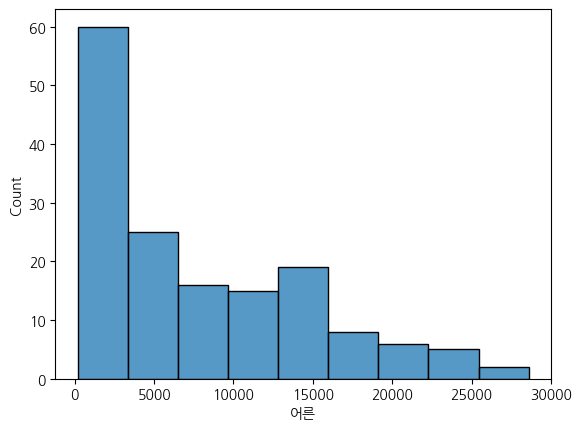

In [39]:
sns.histplot(data=df_sat, x='어른')

<Axes: xlabel='어린이', ylabel='Count'>

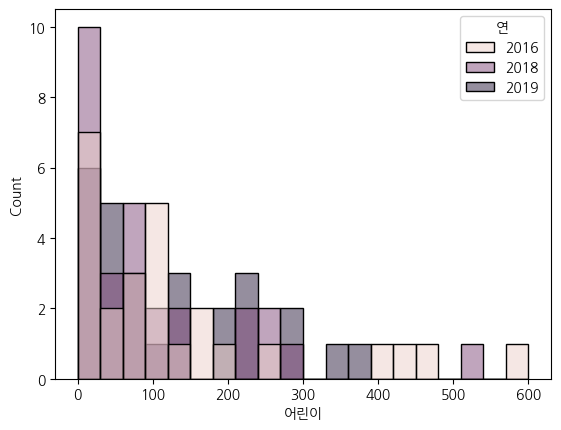

In [48]:
# 연도별 2월 어린이 입장객 수 비교
df_feb = df[df['월']==2]
sns.histplot(data=df_feb, x='어린이', hue='연', bins=20, binrange=(0,600))     # binrange=(최소,최대) -> 구간의 범위 설정

<Axes: xlabel='어린이', ylabel='Count'>

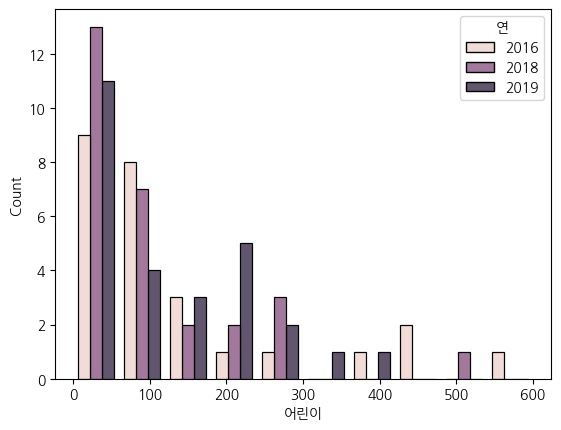

In [50]:
# multiple 설정
sns.histplot(
    data=df_feb, 
    x='어린이', 
    hue='연', 
    bins=10, 
    binrange=(0,600),
    multiple='dodge',    # 그래프가 곂치지 않도록 설정
    shrink=0.8          # 막대의 너비를 조절
)

### 히스토그램그리기

2017년 4월 어른 이용객의 히스토그램을 그리세요. (sns.histplot() 함수를 이용하기)

<Axes: xlabel='어른', ylabel='Count'>

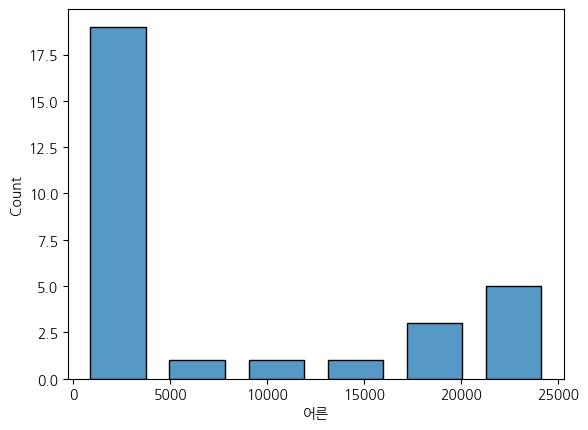

In [62]:
df_2017_apr = df[(df['연']==2017) & (df['월']==4)]

sns.histplot(
    data= df_2017_apr,
    x='어른',
    multiple='dodge',
    shrink=0.7,
)